# Lecture 4: List comprehension & NumPy
ENVR 890-010: Python for Environmental Research, Fall 2021

September 10, 2021

By Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
In this lecture, we will first learn about using **list comprehensions** to write for loops in a more efficient and compact way. We will then move beyond the standard data structures (list, tuple, dictionary) to a more advanced data structure called a **NumPy array**. Along the way, we will learn how **logical indexing** can be used with NumPy as a powerful tool to retrieve and manipulate particular subsets of data.

## List comprehensions
As we learned last week, **loops** can be used to execute a code block for every item in a list. For example, to a list of all integer degrees between 0 and 90 converted to radians, we can write:

In [1]:
import math

def degrees_to_radians(degrees):
    return degrees * (2 * math.pi / 360)

In [2]:
### create list of degrees
degrees = list(range(0, 91))

### use for loop to create list of radians
radians = []
for d in range(0, 91):
    radians.append( degrees_to_radians(d) )
    
print(degrees)
print()
print(radians)
print()
print( len(radians) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

[0.0, 0.017453292519943295, 0.03490658503988659, 0.05235987755982989, 0.06981317007977318, 0.08726646259971647, 0.10471975511965978, 0.12217304763960307, 0.13962634015954636, 0.15707963267948966, 0.17453292519943295, 0.19198621771937624, 0.20943951023931956, 0.22689280275926285, 0.24434609527920614, 0.2617993877991494, 0.2792526803190927, 0.29670597283903605, 0.3141592653589793, 0.33161255787892263, 0.3490658503988659, 0.3665191429188092, 0.3839724354387525, 0.4014257279586958, 0.4188790204786391, 0.4363323129985824, 0.4537856055185257, 0.47123889803846897, 0.4886921905584123, 0.5061454830783556, 0.5235987755982988, 0.5410520681182421, 

[**List comprehensions**](https://docs.python.org/3/tutorial/datastructures.html) are a way to write for loops in a more compact and computationally efficient way:

In [3]:
### do the same thing with list comprehension instead of for loop
radians_lc = [degrees_to_radians(d) for d in degrees]

print(radians_lc)
print()
### check that the two lists are equivalent
print(radians == radians_lc)

[0.0, 0.017453292519943295, 0.03490658503988659, 0.05235987755982989, 0.06981317007977318, 0.08726646259971647, 0.10471975511965978, 0.12217304763960307, 0.13962634015954636, 0.15707963267948966, 0.17453292519943295, 0.19198621771937624, 0.20943951023931956, 0.22689280275926285, 0.24434609527920614, 0.2617993877991494, 0.2792526803190927, 0.29670597283903605, 0.3141592653589793, 0.33161255787892263, 0.3490658503988659, 0.3665191429188092, 0.3839724354387525, 0.4014257279586958, 0.4188790204786391, 0.4363323129985824, 0.4537856055185257, 0.47123889803846897, 0.4886921905584123, 0.5061454830783556, 0.5235987755982988, 0.5410520681182421, 0.5585053606381855, 0.5759586531581288, 0.5934119456780721, 0.6108652381980153, 0.6283185307179586, 0.6457718232379019, 0.6632251157578453, 0.6806784082777885, 0.6981317007977318, 0.7155849933176751, 0.7330382858376184, 0.7504915783575618, 0.767944870877505, 0.7853981633974483, 0.8028514559173916, 0.8203047484373349, 0.8377580409572782, 0.855211333477221

The list comprehension syntax can be thought of as an **expression** (e.g., what to do to each element) followed by a **for clause**, all surrounded by brackets. 

We can include an **if clause** to include only certain elements (for example, those whose degrees are divisible by 10) in the final list:

In [4]:
### first use for loop combined with if statement
radians_divisible10 = []
for d in degrees:
    if d % 10 == 0:
        radians_divisible10.append( degrees_to_radians(d) )
print(radians_divisible10)
print()
print(len(radians_divisible10))

[0.0, 0.17453292519943295, 0.3490658503988659, 0.5235987755982988, 0.6981317007977318, 0.8726646259971648, 1.0471975511965976, 1.2217304763960306, 1.3962634015954636, 1.5707963267948966]

10


In [5]:
### now repeat with list comprehension
radians_divisible10_lc = [degrees_to_radians(d) for d in degrees if d % 10 == 0]

print(radians_divisible10_lc)
print()

print(radians_divisible10 == radians_divisible10_lc)

[0.0, 0.17453292519943295, 0.3490658503988659, 0.5235987755982988, 0.6981317007977318, 0.8726646259971648, 1.0471975511965976, 1.2217304763960306, 1.3962634015954636, 1.5707963267948966]

True


### In class exercise
Assume we work for the county office of environmental quality, and are administering a program that will provide subsidized water quality assessments for all households that rely on private groundwater wells and have incomes less than \$30,000 per year. 

First we will create random demographic data for 1000 households (but pretend for the exercise that this was retrieved from a county database).

In [6]:
import random
## numeric index for each household in county
household = ['H' + str(i) for i in list(range(1000))]
# print(household)

In [7]:
## randomly assign water source for each household
water = [random.choices(['municipal', 'private'], weights = [0.6, 0.4], k=1)[0] for h in household]
# print(water)

In [8]:
## randomly assign income for each household from Normal/Gaussian distribution
income = [max(random.gauss(50000, 20000), 0) for h in household]
# print(income)

1. Use list comprehension to find the list of households with a private water source? How many are there?

In [9]:
private_hh = [household[i] for i in range(1000) if water[i] == 'private']
len(private_hh)

385

In [10]:
# private_hh = []
# for i,hh in enumerate(household):
#     if water[i] == 'private':
#         private_hh.append(hh)
# print(private_hh)

In [11]:
### enumerate example
l = ['r','g']
# for e in l:
#     print(e)
    
# for i in range(len(l)):
#     print(i)
    
# for i in range(len(l)):
#     print(l[i])

# for i,e in enumerate(l):
#     print(i, e)

for i in range(len(l)):
    print(i, l[i])

0 r
1 g


2. How many households meet both criteria for testing?

In [12]:
# eligible = [household[i] for i in range(len(household)) if (water[i] == 'private') and (income[i] < 30000) ]
# print(len(eligible))

# eligible = [private_hh[i] for i in range(len(private_hh)) if (income[i] < 30000) ]
# print(len(eligible))

3. What are the average incomes for households with municipal and private water, respectively? Use the statistics.mean() function.

In [13]:
import statistics
muni_income = [income[i] for i in range(len(household)) if (water[i] == 'municipal') ]
print(statistics.mean(muni_income))

47846.21276418209


In [14]:
### import statistics library
import statistics

### test example to show how to use mean function
test_mean = statistics.mean([1,2,3])
print(test_mean)

2


## NumPy
[NumPy](https://numpy.org/doc/stable/) is one of the most popular packages for scientific computing and data science, and is included in the standard Anaconda installation. It is commonly imported with the **alias** ``np``. 

In [15]:
import numpy as np

### Creating NumPy arrays
NumPy supports a new type of data structure: the **NumPy array**. NumPy arrays are designed to handle large, multi-dimensional arrays of numbers much more easily and efficiently than standard lists.

In [16]:
# here is a standard list with two dimensions
l = [[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]]
print(l, type(l))

[[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]] <class 'list'>


In [17]:
# create a 2D numpy array from l
a = np.array(l)
print(a, type(a))

[[ 1  2  3  4  5]
 [10  9  8  7  6]] <class 'numpy.ndarray'>


Note that, unlike the basic data structures such as lists, **all elements in a NumPy array must be the same type**. Although string types are allowed, NumPy is most commonly used with numeric types such as int and float.

We access the elements the same way as lists:

In [18]:
print(l[1][0])
print(a[1][0])

10
10


Or, alternatively, in a single brackets and separated by a comma:

In [19]:
print(a[0, 2])

3


We can get the number of dimensions and the shape of an array using its ``ndim`` and ``shape`` **properties**. For a 2D array, the shape is (number of rows, number of columns). For larger arrays, it always goes from the innermost set of brackets to the outermost set of brackets.

In [20]:
print( a.ndim )
print( a.shape )
print()

### loop over rows
for i in range(a.shape[0]):
    ### loop over columns
    for j in range(a.shape[1]):
        print( a[i, j])
    print()

2
(2, 5)

1
2
3
4
5

10
9
8
7
6



We can also do multi-dimensional **slices**

In [21]:
print(a[:, 1:4])

[[2 3 4]
 [9 8 7]]


NumPy also has handy **functions** for creating different types of arrays. For example, we can create a new array filled with ones or zeros:

In [22]:
# with a single argument, we will get a 1D array of that length
a = np.ones(3)
print(a, a.shape)

[1. 1. 1.] (3,)


In [23]:
# alternatively, we can give a tuple or list for multi-dimensional arrays
a = np.zeros((3, 10, 20))
print(a, a.shape)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

We can also create **sequences** of numbers easily (similar to list(range()) for lists):

In [24]:
# with one argument, it is assumed to start at zero and count up by one until it reaches your number (not inclusive, it will stop before your number)
a = np.arange(10)
print(a, type(a))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>


In [25]:
# with two arguments, it will start at the 1st number and count up by 1 until reaching the 2nd number
a = np.arange(100, 120)
print(a)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [26]:
# with three arguments, it will start at the 1st and count by increments of the 3rd number until it reaches the 2rd number (again not inclusive)
a = np.arange(10, -21, -2.5)
print(a)

[ 10.    7.5   5.    2.5   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5
 -20. ]


We can draw **random samples** from a normal distribution (or many other distributions). NumPy has functions for creating whole arrays at a time, rather than the one-by-one approach needed for the ``random`` module.

In [27]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)

[[ 19.88819325  13.92495013   1.74523777  11.46473282  29.05482374
    1.4651256   20.40563834  28.95121977  15.54956409  12.34820442]
 [  6.63626323  16.5010895   10.79729849   7.56379522   7.38435798
   22.58079991  18.8098581    6.40401376   8.96626193  26.38510346]
 [  7.54087284  -5.24936967 -11.28094064   4.48557634  -6.19593568
    1.54735705   0.17811327  -0.98270591  18.98234913   8.47753014]
 [ 12.53676871  13.68604311  19.8399316    7.51921663  13.1717591
    9.0828946    7.1403159    3.44500908   7.23399919   8.62511702]
 [ 11.53523194  18.52195864  11.49696926  18.93461366  17.22353669
    8.43122085   2.73509299  -2.41019572  21.42232523   4.14948602]
 [  7.21166842   0.79967147   4.5954098   -5.24590873  13.25490094
    7.20558112   4.57052341  12.26055775  15.66615918  12.49213277]
 [ 15.91121026  -5.24020801   4.57418943   4.3405768   34.81430662
   16.03083717  18.17568085  10.82262157   6.02504193  16.13333235]
 [ 14.36983676   0.67298459   1.26784396   9.28917428  1

### Doing math with NumPy
NumPy makes it very easy to do **element-wise** arithmetic within and between arrays. 

In [28]:
a = np.array([1, 2, 3])
b = a + 3
print(a)
print(b)

[1 2 3]
[4 5 6]


In [29]:
c = a * 2
print(c)

[2 4 6]


Note this behavior is different than for lists, where "+" means append and "*" means replicate. For NumPy, the operations are simply applied to each element.

In [30]:
d = a ** 2
print(d)

[1 4 9]


In [31]:
e = a + d
print(e)

[ 2  6 12]


In [32]:
f = a ** a
print(f)

[ 1  4 27]


NumPy also has many useful functions that perform more complex **mathematical operations** on these arrays. Below are some examples, and many more can be found [here](https://www.geeksforgeeks.org/numpy-mathematical-function/)

In [33]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)
print()

# statistics
print(f'Min: {a.min()}')
print()

[[17.22220543 -8.77606441  9.87863457  9.52460948 14.86818927 11.70693026
   5.37855811  7.03601686  8.98230154 15.25282475]
 [12.49110904  9.16716209  8.55874436  0.64821364 20.20676653 -0.05793676
  26.94872124 27.80592067 11.40037154 23.77878288]
 [10.32490051  9.71890918  8.56815942  4.75440376 25.01181669 22.70815164
   5.52283808 13.01495024 14.49347637 15.33097528]
 [ 0.32301275  3.02017542  0.46826522 18.57765528  1.05558643 -2.88639301
   9.39385171 11.40638785 10.58768795  6.5491044 ]
 [18.5423179  21.81760734 15.87471682 15.24156698 24.6753992  12.22884243
  11.75466447  8.11547249  7.87364771 -1.29442226]
 [ 8.40927413  7.32508265  8.3189931   0.19946469 -3.83581067 13.45219983
  14.77758679 12.9206182  10.53409583  5.83395403]
 [13.51434111 14.02738787  9.06977132 22.78647826 23.18209448 21.20225543
  15.56235726 10.09523174 14.27394001 17.08724771]
 [-1.10698152  1.11133196  9.08229166 15.41049063 -3.87986735 17.42851462
  10.69470471 10.66753845  4.16599046  2.24926555]


In [34]:
print(f'Max of each row: {a.max(axis=1)}' )
print()

Max of each row: [17.22220543 27.80592067 25.01181669 18.57765528 24.6753992  14.77758679
 23.18209448 17.42851462 24.22055551 28.80632336]



In [35]:
print(f'Mean of each column: {a.mean(axis=0)}' )
print()

Mean of each column: [10.091853    8.16908763 11.7339384   9.72807161 12.34967082 10.69901383
 10.84569365 11.32967488 11.09493286 10.00762285]



In [36]:
print(f'Std: {a.std()}' )
print()

Std: 7.9180571693526405



In [37]:
print(f'5th percentile: {np.quantile(a, 0.05)}' )
print()

5th percentile: -2.885764415753809



In [38]:
print(f'Sum of each row: {a.sum(axis=1)}')

Sum of each row: [ 91.07420586 140.94785521 129.44858117  58.495334   134.82981307
  77.93545859 160.80110518  65.82327916 118.922524    82.21743894]


In [39]:
# sort each row
print( np.sort(a, axis=1) )

[[-8.77606441  5.37855811  7.03601686  8.98230154  9.52460948  9.87863457
  11.70693026 14.86818927 15.25282475 17.22220543]
 [-0.05793676  0.64821364  8.55874436  9.16716209 11.40037154 12.49110904
  20.20676653 23.77878288 26.94872124 27.80592067]
 [ 4.75440376  5.52283808  8.56815942  9.71890918 10.32490051 13.01495024
  14.49347637 15.33097528 22.70815164 25.01181669]
 [-2.88639301  0.32301275  0.46826522  1.05558643  3.02017542  6.5491044
   9.39385171 10.58768795 11.40638785 18.57765528]
 [-1.29442226  7.87364771  8.11547249 11.75466447 12.22884243 15.24156698
  15.87471682 18.5423179  21.81760734 24.6753992 ]
 [-3.83581067  0.19946469  5.83395403  7.32508265  8.3189931   8.40927413
  10.53409583 12.9206182  13.45219983 14.77758679]
 [ 9.06977132 10.09523174 13.51434111 14.02738787 14.27394001 15.56235726
  17.08724771 21.20225543 22.78647826 23.18209448]
 [-3.87986735 -1.10698152  1.11133196  2.24926555  4.16599046  9.08229166
  10.66753845 10.69470471 15.41049063 17.42851462]
 

In [40]:
# absolute value of each element
print( np.abs(a) )

[[17.22220543  8.77606441  9.87863457  9.52460948 14.86818927 11.70693026
   5.37855811  7.03601686  8.98230154 15.25282475]
 [12.49110904  9.16716209  8.55874436  0.64821364 20.20676653  0.05793676
  26.94872124 27.80592067 11.40037154 23.77878288]
 [10.32490051  9.71890918  8.56815942  4.75440376 25.01181669 22.70815164
   5.52283808 13.01495024 14.49347637 15.33097528]
 [ 0.32301275  3.02017542  0.46826522 18.57765528  1.05558643  2.88639301
   9.39385171 11.40638785 10.58768795  6.5491044 ]
 [18.5423179  21.81760734 15.87471682 15.24156698 24.6753992  12.22884243
  11.75466447  8.11547249  7.87364771  1.29442226]
 [ 8.40927413  7.32508265  8.3189931   0.19946469  3.83581067 13.45219983
  14.77758679 12.9206182  10.53409583  5.83395403]
 [13.51434111 14.02738787  9.06977132 22.78647826 23.18209448 21.20225543
  15.56235726 10.09523174 14.27394001 17.08724771]
 [ 1.10698152  1.11133196  9.08229166 15.41049063  3.87986735 17.42851462
  10.69470471 10.66753845  4.16599046  2.24926555]


In [41]:
# exponential
print( np.exp(a) )

[[3.01653787e+07 1.54384485e-04 1.95090663e+04 1.36925817e+04
  2.86531621e+06 1.21410210e+05 2.16709578e+02 1.13685034e+03
  7.96093347e+03 4.20937504e+06]
 [2.65962084e+05 9.57740626e+03 5.21213248e+03 1.91212203e+00
  5.96605430e+08 9.43709624e-01 5.05453176e+11 1.19112657e+12
  8.93549158e+04 2.12321606e+10]
 [3.04822707e+04 1.66290955e+04 5.26143680e+03 1.16094413e+02
  7.28608061e+10 7.27821619e+09 2.50344527e+02 4.49077269e+05
  1.96986657e+06 4.55153584e+06]
 [1.38128296e+00 2.04948865e+01 1.59722097e+00 1.16996582e+08
  2.87365985e+00 5.57770374e-02 1.20142859e+04 8.98941233e+04
  3.96437246e+04 6.98618213e+02]
 [1.12934425e+08 2.98721495e+09 7.83974463e+06 4.16225263e+06
  5.20462823e+10 2.04606199e+05 1.27346178e+05 3.34583807e+03
  2.62713115e+03 2.74056151e-01]
 [4.48850127e+03 1.51789934e+03 4.10102860e+03 1.22074911e+00
  2.15838341e-02 6.95370331e+05 2.61712459e+06 4.08651585e+05
  3.75750608e+04 3.41707130e+02]
 [7.39952376e+05 1.23599623e+06 8.68863663e+03 7.87121491e

In [42]:
# square root. 
print( np.sqrt(a) )

[[4.14996451        nan 3.14302952 3.0861966  3.85592911 3.42153917
  2.31917186 2.65254912 2.99704881 3.90548649]
 [3.53427631 3.02773217 2.92553317 0.80511716 4.49519371        nan
  5.19121578 5.27313196 3.37644362 4.87634934]
 [3.21323832 3.11751651 2.92714185 2.18045953 5.00118153 4.76530709
  2.35007193 3.60762391 3.80702986 3.91547893]
 [0.5683421  1.73786519 0.68429907 4.31018042 1.02741736        nan
  3.0649391  3.37733443 3.25387276 2.5591218 ]
 [4.30607918 4.67093217 3.98430883 3.90404495 4.96743387 3.49697618
  3.42850761 2.84876684 2.80600209        nan]
 [2.89987485 2.70648899 2.88426648 0.4466147         nan 3.66772407
  3.84416269 3.59452614 3.24562719 2.41535795]
 [3.67618567 3.74531546 3.0116061  4.77351844 4.81477876 4.60459069
  3.94491537 3.17729944 3.77808682 4.13367242]
 [       nan 1.05419731 3.01368407 3.92561978        nan 4.17474725
  3.27027594 3.26611978 2.04107581 1.49975516]
 [3.13834918 3.49004103 4.32590848 3.25288726 2.45377792 2.64386452
  3.67767038

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Don't be alarmed by the red "RuntimeWarning" here. Usually as long as it is a warning, not an error, you are ok. This warning relates to the special "nan" (Not A Number) values that you see above. These occur when we try to take the square root of a negative number. NumPy returns this special object (np.nan) when we try to do calculations that are undefined.

Rather than element-wise operations, we can also do **matrix operations**. (If your research involves linear algebra, see [here](https://www.geeksforgeeks.org/numpy-linear-algebra/?ref=lbp) for more examples.)

In [43]:
A = a[:3, :3]
print(A)
print()

[[17.22220543 -8.77606441  9.87863457]
 [12.49110904  9.16716209  8.55874436]
 [10.32490051  9.71890918  8.56815942]]



In [44]:
B = a[-3:, -3:]
print(B)

[[10.66753845  4.16599046  2.24926555]
 [-1.33294584 24.22055551 18.17422749]
 [13.56755809  4.41726166 -2.88573133]]


In [45]:
# matrix multiplication
print( np.matmul(A, B) )

[[ 329.4455055   -97.17709797 -149.26796307]
 [ 237.15131662  311.87781256  170.00367364]
 [ 213.43549433  316.25861843  175.13170327]]


In [46]:
# determinant
print( np.linalg.det(A) )

348.15189031126715


### Logical indexing
**Logical indexing** is a powerful way to manipulate parts of your data that meet certain conditions. The idea is to create a NumPy array of Boolean variables, and then use this array to index a new array. For example, we can change all undefined elements in the array to zero as follows:

In [47]:
### create array of square roots, some of which are undefined
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
b = np.sqrt(a)
print(b)

[[0.85068624 3.43201787 3.93056951 2.3256972  2.99530178 3.18181016
  5.15012609 3.02391038 1.92493492 2.17145362]
 [3.5849968  0.52190685 3.13890621 3.70564284 3.46281385 3.62034189
  3.77983483 4.60686707 2.80914731 4.41296573]
 [3.69195951 3.46001339 1.79819906 2.79207948 5.22356888 3.51012051
  3.03824441 2.26554668 4.15434499 3.01017649]
 [3.87140561 2.90866107 4.65400017 3.77696732 3.8369003  2.51177825
         nan 1.20738006 3.89849507        nan]
 [3.58033434        nan 3.63858192 2.8079697  2.16793142 2.4191615
  3.54882165 5.34935776 3.53263371 3.51815391]
 [3.48553043 2.26107741        nan 4.17154435 3.73160163 3.27941041
  3.44104232        nan 2.8210867  4.82324929]
 [4.29060061 4.29564799        nan 4.471728   1.35425679 3.9188681
  2.24409933 2.58070154 2.45801113 2.8385883 ]
 [3.95738298 3.10592643 4.34298793 5.2253747  4.79704081 4.12676053
         nan 4.79830137 1.8682249  2.89505272]
 [2.8893477  3.43101804 3.16937101 4.00168915 3.06739828 4.47600611
         nan 2

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
### create boolean array with "True" everywhere there is an "nan" value, using np.isnan() function
c = np.isnan(b)
print(c)

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False  True False False  True]
 [False  True False False False False False False False False]
 [False False  True False False False False  True False False]
 [False False  True False False False False False False False]
 [False False False False False False  True False False False]
 [False False False False False False  True False False False]
 [False False False False  True False False False False False]]


In [49]:
### create a copy of b, then reset all nan's to 0 using logical indexing
d = b.copy()
d[c] = 0
# print(b)
print(d)

[[0.85068624 3.43201787 3.93056951 2.3256972  2.99530178 3.18181016
  5.15012609 3.02391038 1.92493492 2.17145362]
 [3.5849968  0.52190685 3.13890621 3.70564284 3.46281385 3.62034189
  3.77983483 4.60686707 2.80914731 4.41296573]
 [3.69195951 3.46001339 1.79819906 2.79207948 5.22356888 3.51012051
  3.03824441 2.26554668 4.15434499 3.01017649]
 [3.87140561 2.90866107 4.65400017 3.77696732 3.8369003  2.51177825
  0.         1.20738006 3.89849507 0.        ]
 [3.58033434 0.         3.63858192 2.8079697  2.16793142 2.4191615
  3.54882165 5.34935776 3.53263371 3.51815391]
 [3.48553043 2.26107741 0.         4.17154435 3.73160163 3.27941041
  3.44104232 0.         2.8210867  4.82324929]
 [4.29060061 4.29564799 0.         4.471728   1.35425679 3.9188681
  2.24409933 2.58070154 2.45801113 2.8385883 ]
 [3.95738298 3.10592643 4.34298793 5.2253747  4.79704081 4.12676053
  0.         4.79830137 1.8682249  2.89505272]
 [2.8893477  3.43101804 3.16937101 4.00168915 3.06739828 4.47600611
  0.         2

This can be thought of as a compact representation of two for loops and and one if statement:

In [50]:
### equivalent operations to logical indexing with for loops & if statement
e = b.copy()
for i in range(e.shape[0]):
    for j in range(e.shape[1]):
        if np.isnan(e[i,j]):
            e[i,j] = 0
print(e)
print()

[[0.85068624 3.43201787 3.93056951 2.3256972  2.99530178 3.18181016
  5.15012609 3.02391038 1.92493492 2.17145362]
 [3.5849968  0.52190685 3.13890621 3.70564284 3.46281385 3.62034189
  3.77983483 4.60686707 2.80914731 4.41296573]
 [3.69195951 3.46001339 1.79819906 2.79207948 5.22356888 3.51012051
  3.03824441 2.26554668 4.15434499 3.01017649]
 [3.87140561 2.90866107 4.65400017 3.77696732 3.8369003  2.51177825
  0.         1.20738006 3.89849507 0.        ]
 [3.58033434 0.         3.63858192 2.8079697  2.16793142 2.4191615
  3.54882165 5.34935776 3.53263371 3.51815391]
 [3.48553043 2.26107741 0.         4.17154435 3.73160163 3.27941041
  3.44104232 0.         2.8210867  4.82324929]
 [4.29060061 4.29564799 0.         4.471728   1.35425679 3.9188681
  2.24409933 2.58070154 2.45801113 2.8385883 ]
 [3.95738298 3.10592643 4.34298793 5.2253747  4.79704081 4.12676053
  0.         4.79830137 1.8682249  2.89505272]
 [2.8893477  3.43101804 3.16937101 4.00168915 3.06739828 4.47600611
  0.         2

In [51]:
### compare e & d, check if each element is equivalent
print(e == d)
print()

### check if all elements are equivalent
print(np.all(e == d))

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]

True


We can also retrieve particular elements of the NumPy array using logical indexing, which is analagous to list comprehension. However, note that we lose the shape of the array when we pick out particular elements.

In [52]:
print(e)

[[0.85068624 3.43201787 3.93056951 2.3256972  2.99530178 3.18181016
  5.15012609 3.02391038 1.92493492 2.17145362]
 [3.5849968  0.52190685 3.13890621 3.70564284 3.46281385 3.62034189
  3.77983483 4.60686707 2.80914731 4.41296573]
 [3.69195951 3.46001339 1.79819906 2.79207948 5.22356888 3.51012051
  3.03824441 2.26554668 4.15434499 3.01017649]
 [3.87140561 2.90866107 4.65400017 3.77696732 3.8369003  2.51177825
  0.         1.20738006 3.89849507 0.        ]
 [3.58033434 0.         3.63858192 2.8079697  2.16793142 2.4191615
  3.54882165 5.34935776 3.53263371 3.51815391]
 [3.48553043 2.26107741 0.         4.17154435 3.73160163 3.27941041
  3.44104232 0.         2.8210867  4.82324929]
 [4.29060061 4.29564799 0.         4.471728   1.35425679 3.9188681
  2.24409933 2.58070154 2.45801113 2.8385883 ]
 [3.95738298 3.10592643 4.34298793 5.2253747  4.79704081 4.12676053
  0.         4.79830137 1.8682249  2.89505272]
 [2.8893477  3.43101804 3.16937101 4.00168915 3.06739828 4.47600611
  0.         2

In [53]:
### which elements are greater than 4?
f = e > 4
print(f)

[[False False False False False False  True False False False]
 [False False False False False False False  True False  True]
 [False False False False  True False False False  True False]
 [False False  True False False False False False False False]
 [False False False False False False False  True False False]
 [False False False  True False False False False False  True]
 [ True  True False  True False False False False False False]
 [False False  True  True  True  True False  True False False]
 [False False False  True False  True False False False  True]
 [False  True False  True False False False False False  True]]


In [54]:
### get new array with just these values
g = e[f]
print(g)
print()
print(g.shape)

[5.15012609 4.60686707 4.41296573 5.22356888 4.15434499 4.65400017
 5.34935776 4.17154435 4.82324929 4.29060061 4.29564799 4.471728
 4.34298793 5.2253747  4.79704081 4.12676053 4.79830137 4.00168915
 4.47600611 4.52836201 4.2181023  5.56809207 4.13519727]

(23,)


In [55]:
### often easier to put logical condition right inside brackets instead of defining as separate variable
g = e[e > 4]
print(g)

[5.15012609 4.60686707 4.41296573 5.22356888 4.15434499 4.65400017
 5.34935776 4.17154435 4.82324929 4.29060061 4.29564799 4.471728
 4.34298793 5.2253747  4.79704081 4.12676053 4.79830137 4.00168915
 4.47600611 4.52836201 4.2181023  5.56809207 4.13519727]


To apply multiple logical operations at once, we have to use the **bitwise comparison operators** (``&`` and ``|``) rather than the normal comparison operators (``and`` and ``or``). This is because we want the "and/or" to be applied to each element in the array individually, rather than for the entire array at once.

In [56]:
lt2 = e < 2
print(lt2)

[[ True False False False False False False False  True False]
 [False  True False False False False False False False False]
 [False False  True False False False False False False False]
 [False False False False False False  True  True False  True]
 [False  True False False False False False False False False]
 [False False  True False False False False  True False False]
 [False False  True False  True False False False False False]
 [False False False False False False  True False  True False]
 [False False False False False False  True False False False]
 [ True False False False  True False False False  True False]]


In [57]:
gte4 = e >= 4
print(gte4)

[[False False False False False False  True False False False]
 [False False False False False False False  True False  True]
 [False False False False  True False False False  True False]
 [False False  True False False False False False False False]
 [False False False False False False False  True False False]
 [False False False  True False False False False False  True]
 [ True  True False  True False False False False False False]
 [False False  True  True  True  True False  True False False]
 [False False False  True False  True False False False  True]
 [False  True False  True False False False False False  True]]


In [58]:
lt2_or_gte4 = lt2 | gte4
print(lt2_or_gte4)

[[ True False False False False False  True False  True False]
 [False  True False False False False False  True False  True]
 [False False  True False  True False False False  True False]
 [False False  True False False False  True  True False  True]
 [False  True False False False False False  True False False]
 [False False  True  True False False False  True False  True]
 [ True  True  True  True  True False False False False False]
 [False False  True  True  True  True  True  True  True False]
 [False False False  True False  True  True False False  True]
 [ True  True False  True  True False False False  True  True]]


In [59]:
### this will cause an error, unlike with individual boolean variables
# lt2_or_gte4 = lt2 or gte4

In [60]:
g = e[lt2_or_gte4]
print(g)
print(g.shape)

[0.85068624 5.15012609 1.92493492 0.52190685 4.60686707 4.41296573
 1.79819906 5.22356888 4.15434499 4.65400017 0.         1.20738006
 0.         0.         5.34935776 0.         4.17154435 0.
 4.82324929 4.29060061 4.29564799 0.         4.471728   1.35425679
 4.34298793 5.2253747  4.79704081 4.12676053 0.         4.79830137
 1.8682249  4.00168915 4.47600611 0.         4.52836201 1.81606443
 4.2181023  5.56809207 0.         1.29006635 4.13519727]
(41,)


### In class exercise
Let's pretend you are an air quality specialist who is investigating the [effects of wildfire smoke on PM10 pollution](https://www.climacell.co/blog/pm10-how-wildfires-actually-affect-air-quality/). Assume there is a large wildfire burning in the Bozeman, MT, area (45.677, -111.043), and you have a map of PM10 over the larger region spanning from 40 to 48 degrees latitude and -120 to -102 degrees longitude, at a grid resolution of 1 degrees. 

We will make up fake data using an assumed quadratic trend centered around Bozeman, plus random noise. But the same analysis could be performed using ground measurements or satellite observations of PM10.

In [61]:
## use np.arange to create a grid of coordinates
res = 1
long_box = (-120, -102)
lat_box = (40, 48)
long_grid = np.arange(long_box[0], long_box[1] + 0.01, res)
lat_grid = np.arange(lat_box[1], lat_box[0] - 0.01, -res)
long_n = len(long_grid)
lat_n = len(lat_grid)
print(long_grid) 
print(lat_grid)

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102.]
[48. 47. 46. 45. 44. 43. 42. 41. 40.]


In [62]:
## create list of coords, check orientations
coords = [(long, lat) for lat in lat_grid for long in long_grid]
print(coords)


### for-loop version of the list comprehension above:
coords2 = []
for lat in lat_grid:
    for long in long_grid:
        coords2.append( (long, lat) )

print()
print(coords2 == coords)

[(-120.0, 48.0), (-119.0, 48.0), (-118.0, 48.0), (-117.0, 48.0), (-116.0, 48.0), (-115.0, 48.0), (-114.0, 48.0), (-113.0, 48.0), (-112.0, 48.0), (-111.0, 48.0), (-110.0, 48.0), (-109.0, 48.0), (-108.0, 48.0), (-107.0, 48.0), (-106.0, 48.0), (-105.0, 48.0), (-104.0, 48.0), (-103.0, 48.0), (-102.0, 48.0), (-120.0, 47.0), (-119.0, 47.0), (-118.0, 47.0), (-117.0, 47.0), (-116.0, 47.0), (-115.0, 47.0), (-114.0, 47.0), (-113.0, 47.0), (-112.0, 47.0), (-111.0, 47.0), (-110.0, 47.0), (-109.0, 47.0), (-108.0, 47.0), (-107.0, 47.0), (-106.0, 47.0), (-105.0, 47.0), (-104.0, 47.0), (-103.0, 47.0), (-102.0, 47.0), (-120.0, 46.0), (-119.0, 46.0), (-118.0, 46.0), (-117.0, 46.0), (-116.0, 46.0), (-115.0, 46.0), (-114.0, 46.0), (-113.0, 46.0), (-112.0, 46.0), (-111.0, 46.0), (-110.0, 46.0), (-109.0, 46.0), (-108.0, 46.0), (-107.0, 46.0), (-106.0, 46.0), (-105.0, 46.0), (-104.0, 46.0), (-103.0, 46.0), (-102.0, 46.0), (-120.0, 45.0), (-119.0, 45.0), (-118.0, 45.0), (-117.0, 45.0), (-116.0, 45.0), (-115.0

In [63]:
## assume a quadratic spatial trend for pm10
long_bozeman = -111.043
lat_bozeman = 45.677
def quadratic_trend(long, lat):
    return -1.3*((long - long_bozeman) **2 + (lat - lat_bozeman) **2) + 160

In [64]:
### get list with the pm10 at each coordinate
pm10_lc = [quadratic_trend(longlat[0], longlat[1]) for longlat in coords]
print(pm10_lc)

### for loop version of the list comprehension above
pm10_lc2 = []
for longlat in coords:
    long = longlat[0]
    lat = longlat[1]
    pollution = quadratic_trend(long, lat)
    pm10_lc2.append(pollution)
    
print()
print(pm10_lc2 == pm10_lc)

[48.68856860000014, 70.67676860000013, 90.06496860000011, 106.85316860000009, 121.04136860000008, 132.62956860000006, 141.61776860000003, 148.00596860000002, 151.7941686, 152.9823686, 151.57056859999997, 147.55876859999995, 140.94696859999993, 131.73516859999992, 119.92336859999992, 105.51156859999989, 88.49976859999988, 68.88796859999987, 46.67616859999984, 53.42836860000013, 75.41656860000013, 94.80476860000012, 111.59296860000009, 125.78116860000009, 137.36936860000006, 146.35756860000004, 152.74576860000002, 156.5339686, 157.7221686, 156.31036859999998, 152.29856859999995, 145.68676859999994, 136.47496859999993, 124.66316859999992, 110.25136859999989, 93.23956859999988, 73.62776859999984, 51.41596859999983, 55.56816860000012, 77.55636860000013, 96.94456860000011, 113.7327686000001, 127.92096860000008, 139.50916860000007, 148.49736860000004, 154.88556860000003, 158.67376860000002, 159.8619686, 158.45016859999998, 154.43836859999996, 147.82656859999994, 138.61476859999993, 126.802968

In [65]:
### now convert list to numpy array
pm10 = np.array(pm10_lc)
print(pm10)
print(pm10.shape)

[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
 141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
 140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
  46.6761686  53.4283686  75.4165686  94.8047686 111.5929686 125.7811686
 137.3693686 146.3575686 152.7457686 156.5339686 157.7221686 156.3103686
 152.2985686 145.6867686 136.4749686 124.6631686 110.2513686  93.2395686
  73.6277686  51.4159686  55.5681686  77.5563686  96.9445686 113.7327686
 127.9209686 139.5091686 148.4973686 154.8855686 158.6737686 159.8619686
 158.4501686 154.4383686 147.8265686 138.6147686 126.8029686 112.3911686
  95.3793686  75.7675686  53.5557686  55.1079686  77.0961686  96.4843686
 113.2725686 127.4607686 139.0489686 148.0371686 154.4253686 158.2135686
 159.4017686 157.9899686 153.9781686 147.3663686 138.1545686 126.3427686
 111.9309686  94.9191686  75.3073686  53.0955686  52.0477686  74.0359686
  93.4241686 110.2123686 124.4005686 135.9887686 14

In [66]:
## reshape pm10 observations to match the lat/long shape
pm10 = pm10.reshape([lat_n, long_n])
print(pm10)
print()
print(pm10.shape)

[[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
  141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
  140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
   46.6761686]
 [ 53.4283686  75.4165686  94.8047686 111.5929686 125.7811686 137.3693686
  146.3575686 152.7457686 156.5339686 157.7221686 156.3103686 152.2985686
  145.6867686 136.4749686 124.6631686 110.2513686  93.2395686  73.6277686
   51.4159686]
 [ 55.5681686  77.5563686  96.9445686 113.7327686 127.9209686 139.5091686
  148.4973686 154.8855686 158.6737686 159.8619686 158.4501686 154.4383686
  147.8265686 138.6147686 126.8029686 112.3911686  95.3793686  75.7675686
   53.5557686]
 [ 55.1079686  77.0961686  96.4843686 113.2725686 127.4607686 139.0489686
  148.0371686 154.4253686 158.2135686 159.4017686 157.9899686 153.9781686
  147.3663686 138.1545686 126.3427686 111.9309686  94.9191686  75.3073686
   53.0955686]
 [ 52.0477686  74.0359686  93.4241686 110.2123686 12

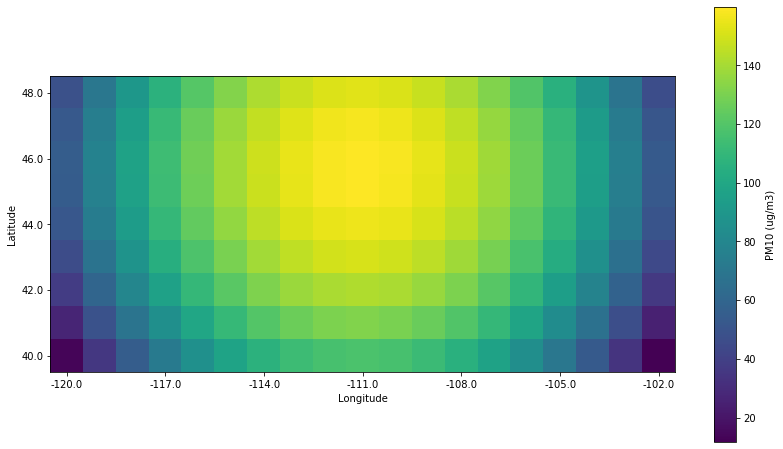

In [67]:
## plot values on a grid. Don't worry too much about how this works yet - we will learn about plotting in a few weeks.
import matplotlib.pyplot as plt

def plot_grid(data, long_grid, lat_grid, label):
    fig, ax = plt.subplots(1,1, figsize=(14,8))
    plt.imshow(data)
    plt.colorbar(label = label)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    ax.set_xticks(list(range(0, len(long_grid), 3)))
    ax.set_yticks(list(range(0, len(lat_grid), 2)))
    ax.set_xticklabels(long_grid[::3])
    ax.set_yticklabels(lat_grid[::2])
    
    
plot_grid(pm10, long_grid, lat_grid, 'PM10 (ug/m3)')

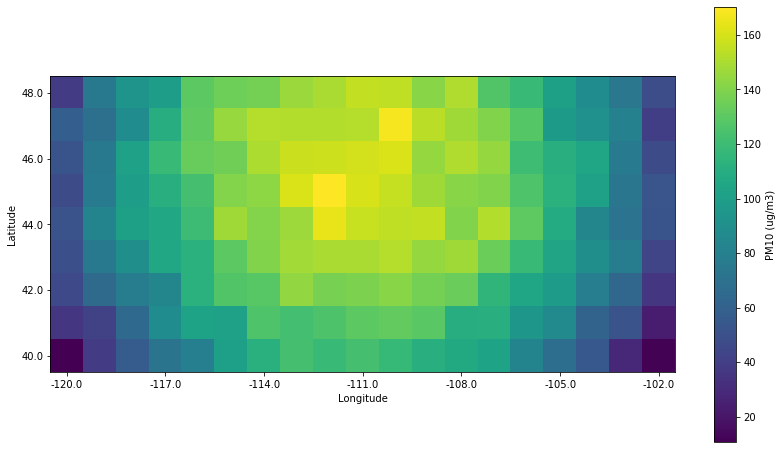

In [68]:
### Now use np.random.normal() to add random noise to the data, with mean and standard distribution of 0 and 5 ug/m3
noise = np.random.normal(0,5,(lat_n, long_n))
pm10_noisy = pm10 + noise

plot_grid(pm10_noisy, long_grid, lat_grid, 'PM10 (ug/m3)')

We will now assume that this "synthetic" dataset is our real data set and use it for analysis. The US EPS's national 24-hour daily standard for PM10 is 150 ug/m3 (for the max 24-hour concentration in one year, averaged over three years. But we will just treat it as a one-day standard for simplicity.)

Use NumPy's built-in functions to answer the following questions:
1. What are the mean and std of PM10 across this region today?

2. Find the mean PM10 for each longitude and latitude.

3. Which longitude has the highest mean PM10? Which latitude has the lowest PM10?

3. What fraction of grid points exceed the EPA daily standard?

4. Use logical indexing to create an array with 1's at locations violating the standard, and 0's at locations not violating the standard. Plot using ``plot_grid``.

5. Assume the following  logistic function (*completely made up, not a real relationship*) for excess cardiovascular deaths per 1,000 people in the region, based on the daily PM10 concentration. 

$$deaths = \frac{15}{1 + \exp(-(PM10 - 80) / 35)}$$

Create a function that uses NumPy to calculate the excess cardio deaths for a grid of pm10 observations, then calculate and plot the grid of excess deaths.